In [2]:
from google.colab import drive

In [3]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout

In [4]:
import numpy as np
import pandas as pd
import cv2
import os

In [5]:
drive.mount('/content/drive')#connect drive to colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Extracting Dataset

In [6]:
Datadir='/content/drive/MyDrive/DataSetDodCat/PetImages'
category=["Dog","Cat"]
dataset=[]
size=120
ct=0;
ct1=0
for types in category:
    path=os.path.join(Datadir,types)
    ex=0
    for img in os.listdir(path):
        if types=='Dog':
            ex=1
            ct=ct+1;
        else :
            ct1=ct1+1;
            ex=0
        try :
            img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img=cv2.resize(img_arr ,(size,size),interpolation=cv2.INTER_AREA)
            dataset.append([new_img,ex])
        except Exception as e:
            pass

In [7]:
import random

In [8]:
random.shuffle(dataset)

In [9]:
X=[]
Y=[]
for features,label in dataset:
  X.append(features)
  Y.append(label)

In [10]:
X=np.array(X).reshape(-1,size,size,1)


In [11]:
X=X/225

# Neural Network

In [12]:
model=Sequential()
model.add(Flatten(input_shape=(120,120)))
model.add(BatchNormalization(axis=1))
model.add(Dropout(0.5))
model.add(Dense(1200,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dropout(0.4))
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 batch_normalization (BatchN  (None, 14400)            57600     
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 1200)              17281200  
                                                                 
 batch_normalization_1 (Batc  (None, 1200)             4800      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1200)              0

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# callbacks

In [15]:

from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
filepath="/content/drive/MyDrive/saved_models/CatvsDog-{epoch:02d}-{val_accuracy:.2f}.hdf5"

# save the model with the best validation (development) accuracy till now
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#
earlystopping = EarlyStopping(monitor='val_loss',patience=8,verbose=1)

logcsv = CSVLogger('mycsvcatvsdog',separator=',',append=False)

callback_list=[checkpoint,earlystopping,logcsv]

#Training 

In [34]:
Yt=np.array(Y)
from sklearn.model_selection import train_test_split
#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Yt, test_size = 0.2)
history=model.fit(X_train,y_train,epochs=3,validation_split=0.2,callbacks=callback_list)

Epoch 1/3
462/462 [==============================] - ETA: 0s - loss: 0.5709 - accuracy: 0.7056
Epoch 1: val_accuracy improved from 0.71807 to 0.73323, saving model to /content/drive/MyDrive/saved_models/CatvsDog-01-0.73.hdf5
462/462 [==============================] - 90s 195ms/step - loss: 0.5709 - accuracy: 0.7056 - val_loss: 0.5487 - val_accuracy: 0.7332
Epoch 2/3
462/462 [==============================] - ETA: 0s - loss: 0.5561 - accuracy: 0.7197
Epoch 2: val_accuracy did not improve from 0.73323
462/462 [==============================] - 89s 193ms/step - loss: 0.5561 - accuracy: 0.7197 - val_loss: 0.5516 - val_accuracy: 0.7235
Epoch 3/3
462/462 [==============================] - ETA: 0s - loss: 0.5469 - accuracy: 0.7257
Epoch 3: val_accuracy did not improve from 0.73323
462/462 [==============================] - 88s 190ms/step - loss: 0.5469 - accuracy: 0.7257 - val_loss: 0.5462 - val_accuracy: 0.7227


predictions

In [35]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

In [36]:
import matplotlib.pyplot as plt

In [37]:
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7116258930504438

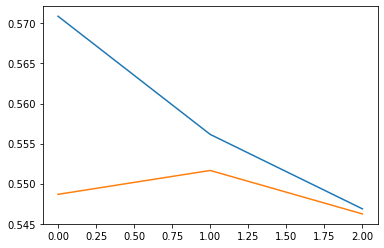

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

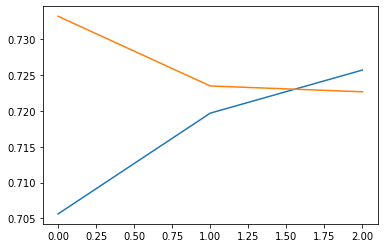

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])